# Clone files from our GitHub Repo

In [6]:
!git clone https://github.com/DamnScallion/Visionary-Unicorns-Project.git

Cloning into 'Visionary-Unicorns-Project'...
remote: Enumerating objects: 10983, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 10983 (delta 18), reused 3 (delta 0), pack-reused 10941
Receiving objects: 100% (10983/10983), 87.61 MiB | 31.65 MiB/s, done.
Resolving deltas: 100% (64/64), done.
Updating files: 100% (10835/10835), done.


In [7]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.0/608.0 kB 10.5 MB/s eta 0:00:00


In [8]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os

In [9]:
ROOT_DIR = '/content/Visionary-Unicorns-Project/yolo/config'

In [10]:
# Create a new YOLO model from scratch
# Below is YOLOv8 Nano size model architecture
model = YOLO('yolov8n.yaml')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [17]:
import cv2
from google.colab.patches import cv2_imshow
import math

In [ ]:
# trained_model = YOLO(os.path.join(ROOT_DIR, 'runs/detect/train/weights/best.pt'))

In [18]:
# Function to perform object detection
def detection(img_path, model):
  # Load image
  img = cv2.imread(img_path)

  # Perform object detection
  results = model.predict(source = img)

  # print(f'results = {results}')

  # Extract bounding boxes
  boxes = results[0].boxes
  print(f'boxes length = {len(boxes)}')

  bounding_boxes = []

  for box in boxes:
    left, top, right, bottom = box.xyxy[0]
    # left, top, right, bottom = int(left), int(top), int(right), int(bottom)
    left, top, right, bottom = int(math.ceil(left)), int(math.ceil(top)), int(math.ceil(right)), int(math.ceil(bottom))
    print(left, top, right, bottom)
    print(f'box = {box}')

    cls_id = int(list(box.cls)[0])

    print(f'cls_id = {cls_id}')

    bounding_boxes.append((left, top, right, bottom))

  return bounding_boxes

In [19]:
# VAL_DIR = '/content/drive/My Drive/Visionary-Unicorns-Project'
VAL_DIR = '/content/Visionary-Unicorns-Project'


0: 224x224 2 penguins, 6.5ms
Speed: 2.3ms preprocess, 6.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 224)
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


boxes length = 2
0 199 601 499
box = ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[  0.0000, 198.2717, 600.5193, 498.3521,   0.7536,   0.0000]], device='cuda:0')
cls: tensor([0.], device='cuda:0')
conf: tensor([0.7536], device='cuda:0')
data: tensor([[  0.0000, 198.2717, 600.5193, 498.3521,   0.7536,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[300.2597, 348.3119, 600.5193, 300.0804]], device='cuda:0')
xywhn: tensor([[0.4692, 0.5442, 0.9383, 0.4689]], device='cuda:0')
xyxy: tensor([[  0.0000, 198.2717, 600.5193, 498.3521]], device='cuda:0')
xyxyn: tensor([[0.0000, 0.3098, 0.9383, 0.7787]], device='cuda:0')
cls_id = 0
2 207 379 466
box = ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[1.8015e+00, 2.0635e+02, 3.7831e+02, 4.6589e+02, 2.5666e-01, 0.0000e+00]], device='cuda:0')
cls: tensor([0.], device='cuda:0')
conf: tensor([0.2567], device='cuda:0')
data: tensor([

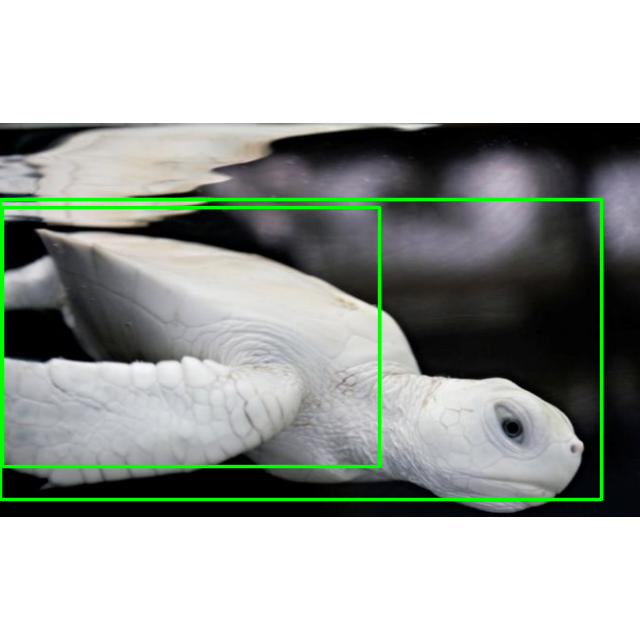

In [25]:
# Example usage
image_path = os.path.join(VAL_DIR, 'data/original/valid/image_id_050.jpg')

image = cv2.imread(image_path)

bounding_boxes = detection(image_path, model)

# Draw bounding boxes on the image
for (left, top, right, bottom) in bounding_boxes:
    start_point = (left, top)
    end_point = (right, bottom)
    color = (0, 255, 0)
    thickness = 2
    lineType = cv2.LINE_AA
    cv2.rectangle(image, start_point, end_point, color, thickness, lineType)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()